<a href="https://colab.research.google.com/github/shripaddhopate/GRIP-TASK/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#THE SPARKS FOUNDATION : Data Science & Business Analytics
#NAME : SHRIPAD DHOPATE
#TASK 3 : Perform 'Exploratory Data Analysis' on dataset 'Sample Superstore'
#AIM : In this task we will try to find the weak areas where you can work to make more profit

#IMPORTING REQUIRED LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sbn

#Importing Data Set

In [ ]:
df = pd.read_csv('/content/sample_data/SampleSuperstore.csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


#DATA CLEANING AND BASIC ANALYSIS 

In [ ]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.shape

(9994, 13)

In [ ]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [ ]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated().sum()

17

In [ ]:
df.drop_duplicates()
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#DATA VISULAIZATION

In [ ]:
df = df.drop(['Postal Code'],axis = 1)

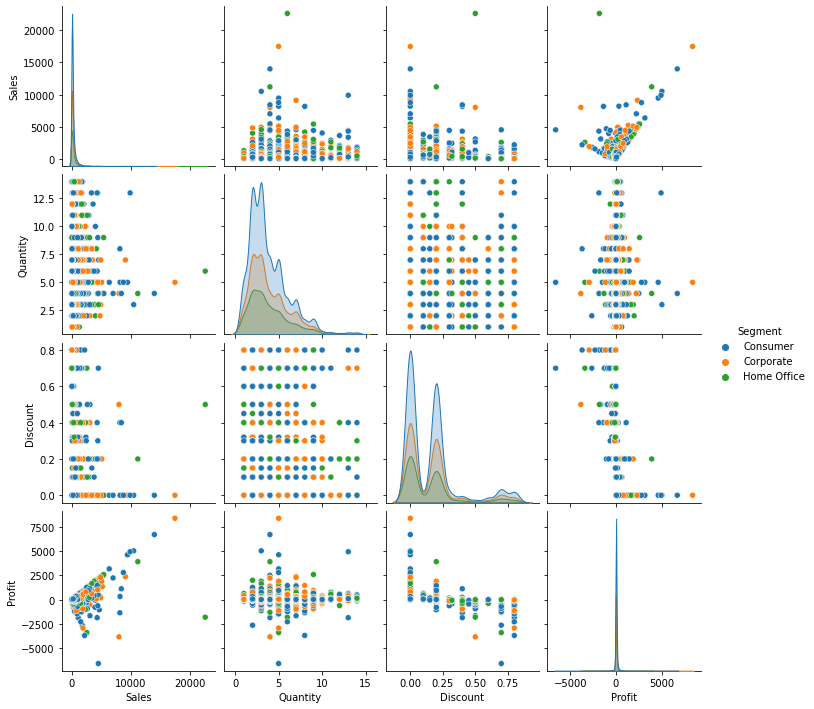

In [ ]:
sbn.pairplot(df, hue ='Segment' )
plt.show()

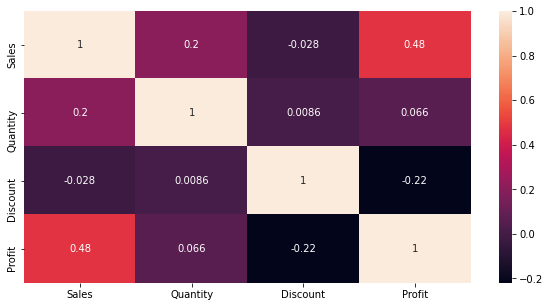

In [ ]:
# finding the pairwise correlations between the columns and visualising using heatmaps
df.corr()
plt.figure(figsize=(10,5))
sbn.heatmap(df.corr(), annot=True)
plt.show()

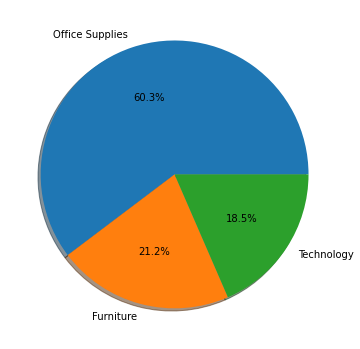

In [ ]:
plt.figure(figsize=(6,8))
plt.pie(df['Category'].value_counts(), labels=df['Category'].value_counts().index , autopct='%1.1f%%' , shadow='True' )
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<Figure size 576x864 with 0 Axes>

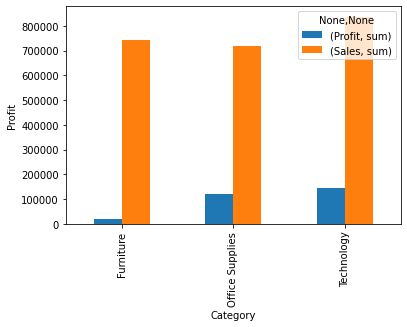

In [ ]:
plt.figure(figsize= (8,12))
df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.ylabel('Profit')
plt.show()

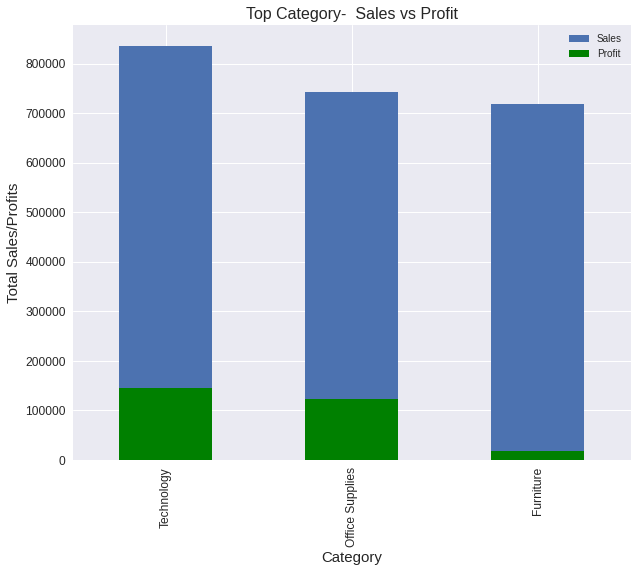

In [ ]:
plt.figure(figsize=(10,8))
# top categories in sales from first 100 observations
top_category_s = df.groupby("Category").Sales.sum().nlargest(n=100)
# top categories in profit from first 100 observations
top_category_p = df.groupby("Category").Profit.sum().nlargest(n=100)
plt.style.use('seaborn')
top_category_s.plot(kind = 'bar',fontsize = 12, label = 'Sales')
top_category_p.plot(kind = 'bar',fontsize = 12,color='g',label = 'Profit')
plt.xlabel('Category',fontsize = 15)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("Top Category-  Sales vs Profit",fontsize = 16)
plt.legend()
plt.show()

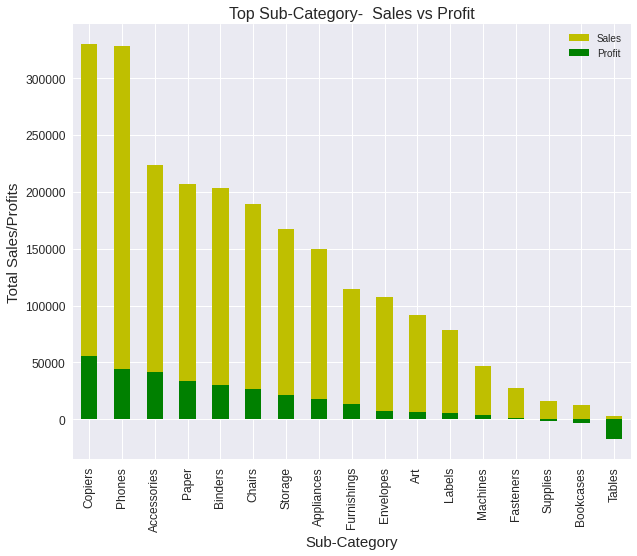

In [ ]:
plt.figure(figsize=(10,8))
# top categories in sales from first 100 observations
top_category_s = df.groupby("Sub-Category").Sales.sum().nlargest(n=100)
# top categories in profit from first 100 observations
top_category_p = df.groupby("Sub-Category").Profit.sum().nlargest(n=100)
plt.style.use('seaborn')
top_category_s.plot(kind = 'bar',fontsize = 12, label = 'Sales',color='y')
top_category_p.plot(kind = 'bar',fontsize = 12,color='g',label = 'Profit')
plt.xlabel('Sub-Category',fontsize = 15)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("Top Sub-Category-  Sales vs Profit",fontsize = 16)
plt.legend()
plt.show()

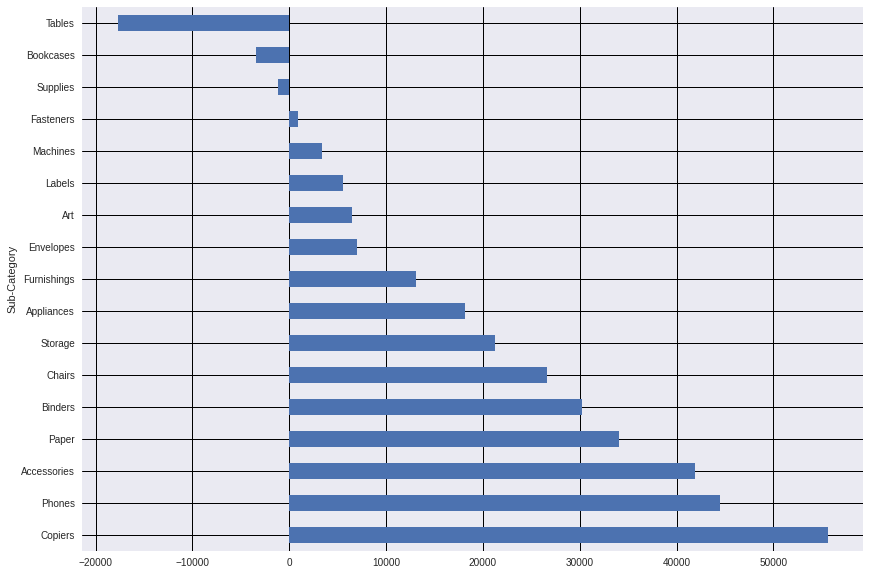

In [ ]:
plt.figure(figsize=(14,10))
statewise = df.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
plt.grid(color = 'black')
statewise.plot.barh()

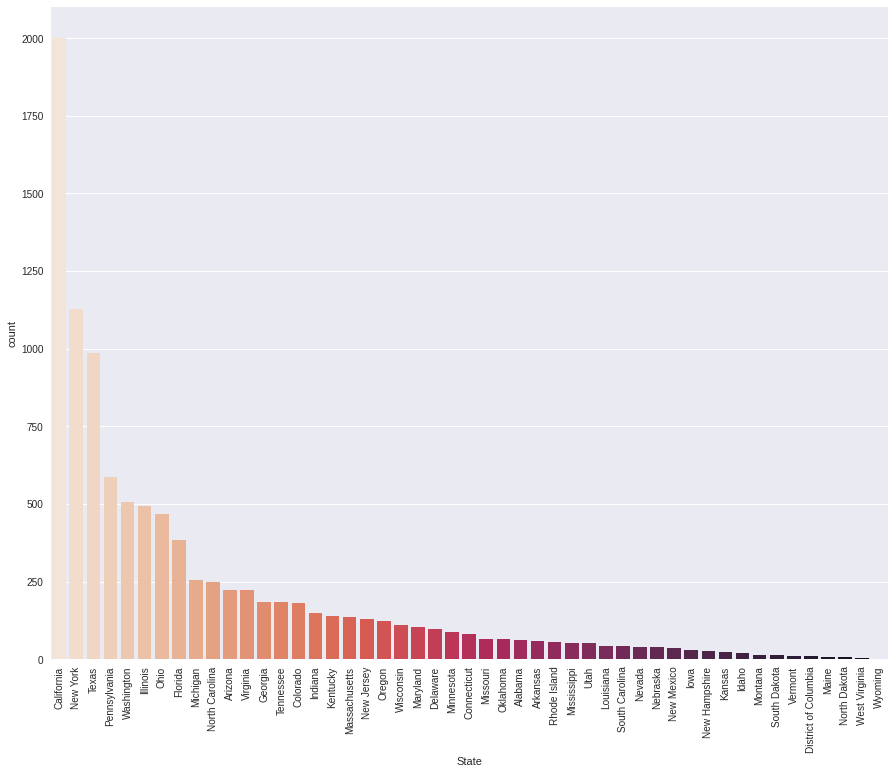

In [ ]:
plt.figure(figsize=(15,12))
sbn.countplot(x='State',data=df,palette='rocket_r',order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

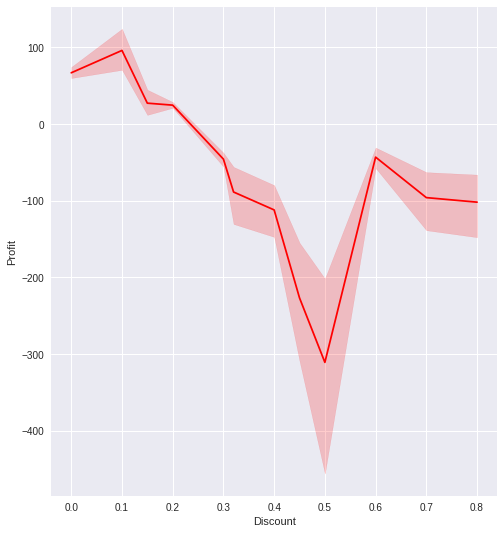

In [ ]:
plt.figure(figsize=(8,9))
sbn.lineplot(df['Discount'], df['Profit'], data=df,color = 'red')
plt.plot()

<Figure size 1080x720 with 0 Axes>

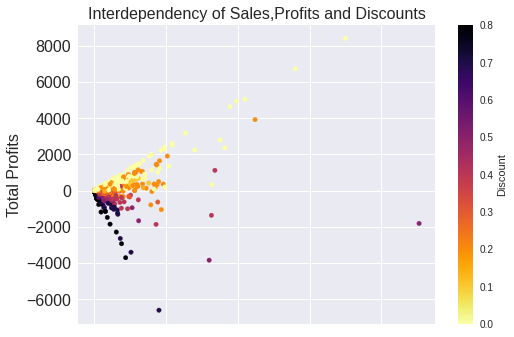

In [ ]:
plt.figure(figsize=(15,10))
plt.style.use('seaborn')
df.plot(kind = "scatter",x = "Sales", y= "Profit", c = "Discount", s = 20,fontsize = 16, colormap = "inferno_r")
plt.ylabel('Total Profits',fontsize = 16)
plt.title("Interdependency of Sales,Profits and Discounts",fontsize = 16)
plt.show()

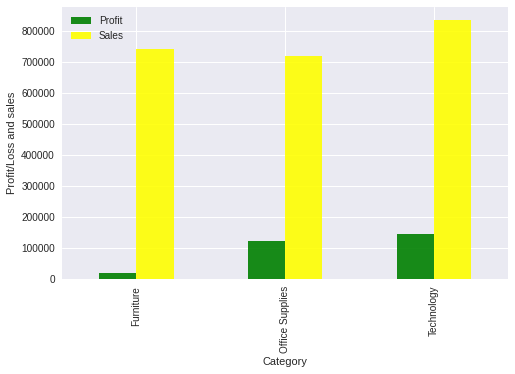

In [ ]:
df.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['green','yellow'],alpha=0.9,figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

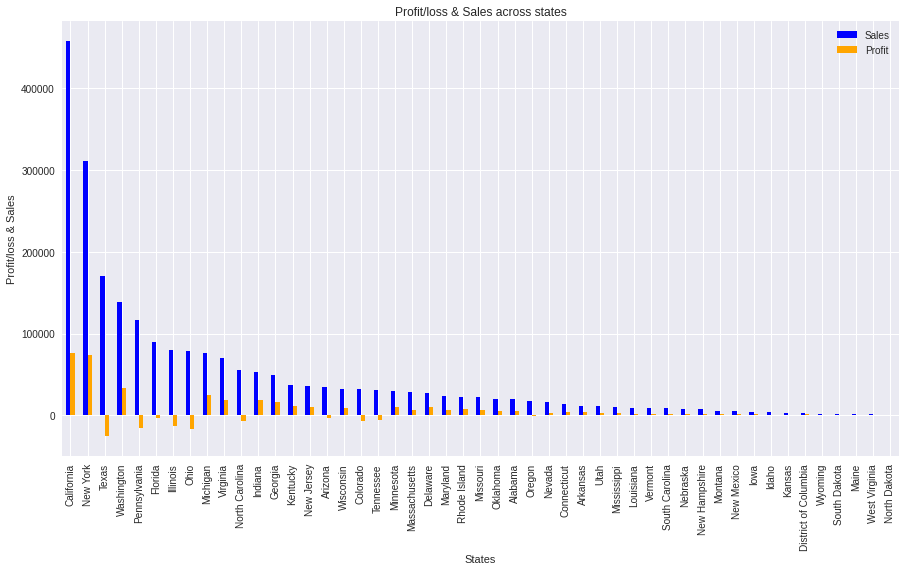

In [ ]:
ps = df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['blue','orange'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()

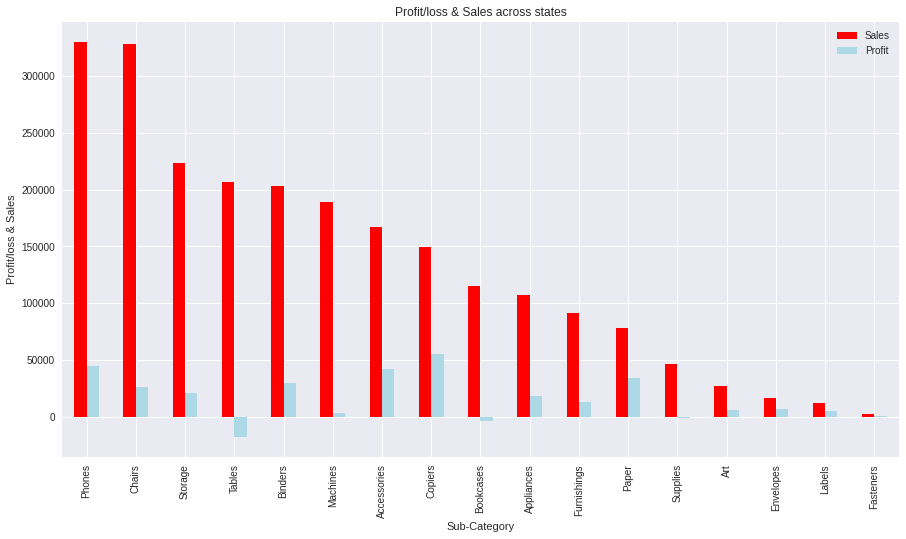

In [ ]:

ps = df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['red','lightblue'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss & Sales')
plt.show()

# Conclusion

1)In states like 'New York' and 'California' there is comparatively low profit with respect to th sale so we should concentrate on incresasing profit

2)Considering the sub-categories sales of tables should be minimized.

3) We should limit sales of furniture and increase that of technology and office suppliers as furniture has very less profit as compared to sales.



